#First Notebook: Standard aspects of Python

The first thing we need to do with Programming is to get Python to print out the statement "Hello World". It's like a cardinal rule of teaching programming. Do this by using the print() function below, putting "Hello World" in there and hitting the play button:

In [ ]:
print("Hello World")

Hello World


Now we've got that done we can see some of the standard operations Python can do. Try doing some addition and multiplication; below are the calculations 5+0.5 and 276 * 52, change these to your own choice of numbers to see it's working correctly:

In [ ]:
5 + .5

5.5

In [ ]:
276*52

14352

Python is great for working with data because of how it handles sets of observations. This can be done really simply using a list which is set up using square brackets [].

In [ ]:
[1,2,3,4,5]

[1, 2, 3, 4, 5]

It's all very well doing that with the data, but this isn't saved; it's just been printed out. To save the information so we can use it later we need to create a *variable*, say *x*. Now Python will save the information in the variable *x*, but won't print it out anymore so we need to print(x) if we want to get the information back out:

In [ ]:
x = ["XE", "f-pace","XJ","F-type"]
print("Cars are:",x)
#x.append("E-type")
#print("Cars are:",x)

Cars are: ['XE', 'f-pace', 'XJ', 'F-type']


This is a simplistic use, but what if we needed to use the variable to have calculations saved for return, e.g. car prices. Let's look at the prices first and then see what would happen if the chancellor decided to cut VAT on new cars. To make this change we need to adapt each value in the list requiring a *loop*.

In [ ]:
prices = [34255,40860,66970,54510]

# print out what the prices are:
print("Prices are:",prices)

for index in range(len(prices)):
  prices[index] = int(prices[index]/1.2)

# print out what the new prices are:
print("Prices without VAT are: ",prices)

Prices are: [34255, 40860, 66970, 54510]
Prices without VAT are:  [28545, 34050, 55808, 45425]


Now we've got two different lists with the car names and prices, but what would be really useful was if we had them stored a singe data type; the natural choice is a *dictionary*:

In [ ]:
Cars = {}
for index in range(len(prices)):
  Cars[x[index]]=prices[index]
print(Cars)

{'XE': 28545, 'f-pace': 34050, 'XJ': 55808, 'F-type': 45425}


Now we have a dictionary called Cars we can adapt individual prices and get specific information really easily. Let's cut the price of the XE by £500 due to a promotion:

In [ ]:
Cars['XE']=Cars['XE']-500
print(Cars)

{'XE': 28045, 'f-pace': 34050, 'XJ': 55808, 'F-type': 45425}


So far we've looked at two standard Python data types; lists and dictionaries. For this little example we were ok using lists, but if we had a large dataset and wanted to change all of the elements it would be really cumbersome using loops. We can avoid this by using *arrays* which are part of the Numpy library. So let's import the numpy library:

In [ ]:
import numpy
prices_array = numpy.array([34255, 40860, 66970, 54510])
print(numpy.round(prices_array*(1/1.2)))

[28546. 34050. 55808. 45425.]


So now we managed to remove the VAT and print out the array in a single line of code. What would be great is if we could store both sets of prices in a single 2-dimensional array to alter and query. To do this we create an empty array *prices_with_and_without_vat* and then populate the columns at index *0* and *1*.

In [ ]:
import numpy as np
# writing numpy each time is too long, so shortened to np
prices_with_and_without_vat = np.empty([len(prices_array),2])
prices_with_and_without_vat[:,0] = np.array(prices)
prices_with_and_without_vat[:,1] = np.array(prices_array)
print("Prices without and with VAT are:\n",prices_with_and_without_vat)
print("This can also be done by having the arrays to be joined inside square brackets")
z = np.array([np.array(prices),prices_array])
print(z)
print("but to get this the right way round we need to transpose the array:")
print(z.T)

Prices without and with VAT are:
 [[28545. 34255.]
 [34050. 40860.]
 [55808. 66970.]
 [45425. 54510.]]
This can also be done by having the arrays to be joined inside square brackets
[[28545 34050 55808 45425]
 [34255 40860 66970 54510]]
but to get this the right way round we need to transpose the array:
[[28545 34255]
 [34050 40860]
 [55808 66970]
 [45425 54510]]


# Getting Started with Pandas

We'll be using arrays more extensively over the next few days for handling numerical data, but before we move on we're going to extend the array concept to include row and column headers by creating *data frames* using the *Pandas* library. Pandas is used exhaustively for importing and manipulating data before processing, cleaning and selecting relevant attributes to be converted to arrays that can be used with *Machine Learning* techniques. Let's look at some of the functionalities of Pandas with data from the Hubble Telescope:

In [1]:
import pandas as pd
data = pd.read_csv("1c. hubble_data.csv")
# Have a peek at the first few elements
data.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [2]:
# You can view specific columns in the same way we did with the dictionary and find summary stats
print(data["distance"],"\n")
print("Mean: ",data["distance"].mean())
print("Median: ",data["distance"].median())

0     0.032
1     0.034
2     0.214
3     0.263
4     0.275
5     0.275
6     0.450
7     0.500
8     0.500
9     0.630
10    0.800
11    0.900
12    0.900
13    0.900
14    0.900
15    1.000
16    1.100
17    1.100
18    1.400
19    1.700
20    2.000
21    2.000
22    2.000
23    2.000
Name: distance, dtype: float64 

Mean:  0.9113749999999999
Median:  0.9


In [3]:
# Or we can just get Python to do the summarising for us:
data.describe()

,distance,recession_velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


In [4]:
# What if we need to sort the data?
data.sort_values(by=['recession_velocity']).tail()

,distance,recession_velocity
22,2.0,800
21,2.0,850
15,1.0,920
19,1.7,960
23,2.0,1090


Listing the data is ok, but it's often more useful to be able to plot observations to get more of intuitive insights. For this we use the matplotlib library:

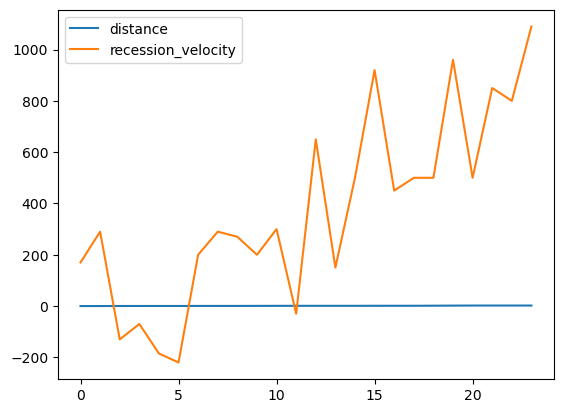

In [5]:
import matplotlib.pyplot as plt
data.plot()
plt.show()

This was a simple plot and it's quite straightforward, but the scale of the two different columns messes this up. What we need is to view the two columns on the same plot with different "y" axes:

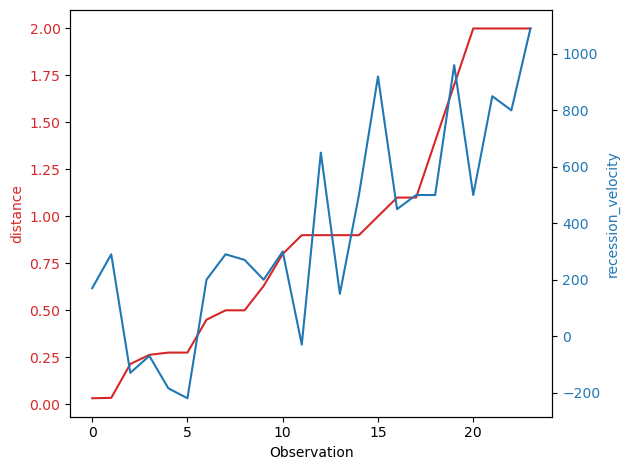

In [6]:
fig, ax1 = plt.subplots()
t = range(0,len(data))

color = 'tab:red'
ax1.set_xlabel('Observation')
ax1.set_ylabel('distance', color=color)
ax1.plot(t, data["distance"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('recession_velocity', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data["recession_velocity"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

These values look really well correlated, albeit on a completely different scale. This correlation fits a straight-line relationship really quite well; as can be seen when we get Python to calculate the correlation value using the SciPy library:

In [7]:
from scipy.stats import pearsonr
corr = pearsonr(data["distance"],data["recession_velocity"])[0]
print(corr)

0.7896394879353184


So if they're this correlated and from the plot it looks like you can draw a straight line through both then we should be able to use a straight line function to map from a distance measurement to estimate the recession_velocity.

In [8]:
from scipy.stats import linregress
u = linregress(data["distance"],data["recession_velocity"])
print(u)
# let's format this as a * distance + b:
a = u[0]
b = u[1]
print("Predicted: ",data["distance"][10]*a + b,"Actual: ",data["recession_velocity"][10])
print("Predicted: ",data["distance"][15]*a + b,"Actual: ",data["recession_velocity"][15])

LinregressResult(slope=454.15844092262836, intercept=-40.78364909586037, rvalue=0.7896394879353181, pvalue=4.477491000609205e-06, stderr=75.23710534716912, intercept_stderr=83.43886993606563)
Predicted:  322.54310364224233 Actual:  300
Predicted:  413.374791826768 Actual:  920


This looks good for the first prediction, but it's really not that close for the second one. Part of the problem is that the two variables are on completely different scales. If we *normalise* them then the predictions will be closer. We're going to use a *function* which takes a data in (using the variable *df*) and returns the normalised version scaled between 0 and 1:

In [9]:
def normalise(df):
  return (df-df.min())/(df.max()-df.min())

data_normalised = normalise(data)
print("The dataframe is now normalised:")
data_normalised.head()

The dataframe is now normalised:


,distance,recession_velocity
0,0.000000,0.297710
1,0.001016,0.389313
2,0.092480,0.068702
3,0.117378,0.114504
4,0.123476,0.026718


When we re-run the linear *regression* to predict recession_velocity from distance we see that the correlation is the same, but the outputs of the prediction are closer together now.

In [10]:
u2 = linregress(data_normalised["distance"],data_normalised["recession_velocity"])
print(u2)
# let's format this as a * distance + b:
a2 = u2[0]
b2 = u2[1]
print("Predicted: ",data_normalised["distance"][10]*a2 + b2,"Actual: ",data_normalised["recession_velocity"][10])
print("Predicted: ",data_normalised["distance"][15]*a2 + b2,"Actual: ",data_normalised["recession_velocity"][15])

LinregressResult(slope=0.6822777188822386, intercept=0.14790032138447612, rvalue=0.7896394879353184, pvalue=4.477491000609155e-06, stderr=0.11302795673528912, intercept_stderr=0.06219228184188979)
Predicted:  0.4141550409482766 Actual:  0.3969465648854962
Predicted:  0.48349220750134964 Actual:  0.8702290076335878


#Data Manipulation with Pandas

This has been a really simple example. Now we're going to move on to looking at data exploration, for which we need a more complex dataset. We're going to be looking at recorded measurements of city temperatures. Datacentres are now predominantly built in cold climates as it costs less for the servers to be cooled. Producing long-lasting strong alcohol in equatorial climates is extemely difficult. Manufacturing by necessity means you need to understand the climate within which you are operating. As before, let's start by loading in the data.

In [ ]:
data = pd.read_csv("/content/1d. city_temperature.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


To start with, look at part of the data and describe it to get a feel for the headings and information contained within the dataframe. Then we need to check if there are any null values:

In [ ]:
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [ ]:
#data.describe()

In [ ]:
data.isna().any()

Region            False
Country           False
State              True
City              False
Month             False
Day               False
Year              False
AvgTemperature    False
dtype: bool

In [ ]:
# Let's see what the City are in the dataframe:
data.City.unique()

array(['Algiers', 'Bujumbura', 'Cotonou', 'Bangui', 'Brazzaville',
       'Cairo', 'Addis Ababa', 'Libreville', 'Banjul', 'Conakry',
       'Bissau', 'Abidjan', 'Nairobi', 'Rabat', 'Antananarivo',
       'Nouakchott', 'Lilongwe', 'Maputo', 'Windhoek', 'Niamey', 'Lagos',
       'Dakar', 'Freetown', 'Capetown', 'Lome', 'Tunis', 'Dar Es Salaam',
       'Kampala', 'Lusaka', 'Dhaka', 'Beijing', 'Chengdu', 'Guangzhou',
       'Shanghai', 'Shenyang', 'Hong Kong', 'Bombay (Mumbai)', 'Calcutta',
       'Chennai (Madras)', 'Delhi', 'Jakarta', 'Osaka', 'Sapporo',
       'Tokyo', 'Almaty', 'Bishkek', 'Vientiane', 'Kuala Lumpur',
       'Ulan-bator', 'Rangoon', 'Katmandu', 'Pyongyang', 'Islamabad',
       'Karachi', 'Manila', 'Singapore', 'Seoul', 'Colombo', 'Taipei',
       'Dusanbe', 'Bangkok', 'Ashabad', 'Tashkent', 'Hanoi', 'Brisbane',
       'Canberra', 'Melbourne', 'Perth', 'Sydney', 'Auckland', 'Tirana',
       'Vienna', 'Minsk', 'Brussels', 'Sofia', 'Zagreb', 'Nicosia',
       'Prague', 'Co

In [ ]:
# So the temperatures are stored in farenheight and as a more modern group we want to work with celsius, so let's use a function to transform the data:
def to_celsius(row):
    return round((row-32) * (5/9),1)

data['AvgTemperature'] = data['AvgTemperature'].apply(to_celsius)

In [ ]:
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.9
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.7
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.3
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.0
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.8


We can get a summary of what's going on within a dataset by grouping subcategories together, for instance getting the averages of the dataframe for each Region-Country-State-City and Year:

In [ ]:
data.groupby(['Region','Country','State','City','Year']).mean()

Month  ...  AvgTemperature
Region        Country State                  City                 Year            ...                
North America US      Additional Territories San Juan Puerto Rico 1995  6.526027  ...       27.008493
                                                                  1996  6.513661  ...      -15.196721
                                                                  1997  6.526027  ...       15.360548
                                                                  1998  6.526027  ...       11.422466
                                                                  1999  6.526027  ...       16.188767
...                                                                          ...  ...             ...
                      Wyoming                Cheyenne             2016  6.513661  ...        9.178689
                                                                  2017  6.526027  ...        9.107397
                                                                  2018  6.526027  ...        8.496164
                                                                  2019  6.526027  ...        7.590959
                                                                  2020  2.738806  ...        1.961940

[4031 rows x 3 columns]

Sometimes we know what city we want information for so can get a *slice* of the dataframe for subsequent plotting and analysis. Let's focus in on Vienna and look at the annual average temperatures.

In [ ]:
#Filtering the data of Lagos for 5 years (temperature)
data = data[data.Year > 1990]
Lagos = data[data['City']=='Lagos'].copy() # great city
Lagos = Lagos.groupby(['Year']).mean()
Lagos.drop(columns=['Month','Day']).head()

,AvgTemperature
Year,
1998,-6.077174
1999,8.012603
2000,-43.645628
2001,-2.084384
2002,-23.160548


In [ ]:
Calcutta = data[data['City']=='Calcutta'].copy() # great city
Calcutta = Calcutta.groupby(['Year']).mean()
Calcutta.drop(columns=['Month','Day']).head()

,AvgTemperature
Year,
1995,25.461644
1996,24.899180
1997,25.960822
1998,25.441096
1999,26.257534


In [ ]:
Milan = data[data['City']=='Milan'].copy() # great city
Milan = Milan.groupby(['Year']).mean()
Milan.drop(columns=['Month','Day']).head()

,AvgTemperature
Year,
1995,11.006301
1996,11.410109
1997,12.621096
1998,11.451781
1999,12.486849


This is all well, but let's see a plot to get a really good idea of what's gone on here:

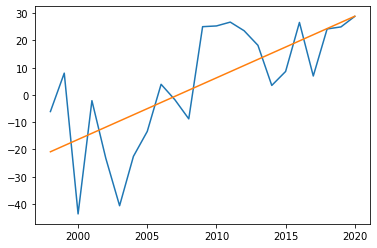

In [ ]:
# Plotting a line chart
import matplotlib.pyplot as plt

plt.plot(Lagos.index,Lagos['AvgTemperature'])

# fit a linear regression (trend)
m, b = np.polyfit(Lagos.index, Lagos['AvgTemperature'], 1)
plt.plot(Lagos.index, m * Lagos.index + b)

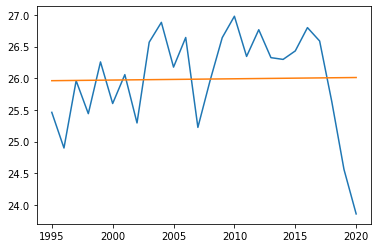

In [ ]:
# Plotting a line chart
import matplotlib.pyplot as plt
import numpy as np

plt.plot(Calcutta.index,Calcutta['AvgTemperature'])

# fit a linear regression (trend)
m, b = np.polyfit(Calcutta.index, Calcutta['AvgTemperature'], 1)
plt.plot(Calcutta.index, m * Calcutta.index + b)

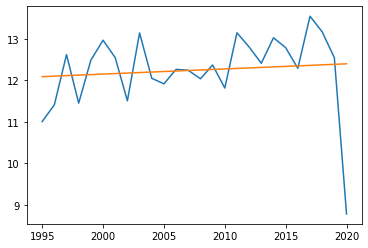

In [ ]:
# Plotting a line chart
import matplotlib.pyplot as plt
import numpy as np

plt.plot(Milan.index,Milan['AvgTemperature'])

# fit a linear regression (trend)
m, b = np.polyfit(Milan.index, Milan['AvgTemperature'], 1)
plt.plot(Milan.index, m * Milan.index + b)

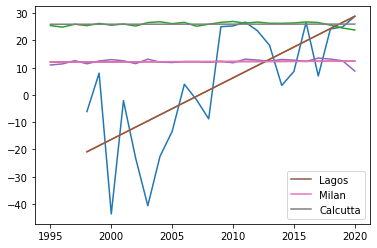

In [ ]:
# Plotting a line chart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.plot(Lagos.index,Lagos['AvgTemperature'])

# fit a linear regression (trend)
m2, b2 = np.polyfit(Lagos.index, Lagos['AvgTemperature'], 1)
plt.plot(Lagos.index, m2 * Lagos.index + b2)

plt.plot(Calcutta.index,Calcutta['AvgTemperature'])

# fit a linear regression (trend)
m1, b1 = np.polyfit(Calcutta.index, Calcutta['AvgTemperature'], 1)
plt.plot(Calcutta.index, m * Calcutta.index + b)

plt.plot(Milan.index,Milan['AvgTemperature'])


# fit a linear regression (trend)
m, b = np.polyfit(Milan.index, Milan['AvgTemperature'], 1)
plt.plot(Lagos.index, m2 * Lagos.index + b2, label = "Lagos")
plt.plot(Milan.index, m * Milan.index + b, label = "Milan" )
plt.plot(Calcutta.index, m1 * Calcutta.index + b1, label = "Calcutta")
plt.legend(loc="best")


So here we've got an idea of what's going on, but there's a significant drop in 2020. What could be causing this? Let's explore and see the values for each year to check that 2020 is plotting correctly. Then let's view the *time series* for 2018-2020 and see what's going on with the trend.

In [ ]:
Lagos.tail(11)
Calcutta.tail(11)
Milan.tail(11)

,Month,Day,AvgTemperature
Year,,,
2010,6.526027,15.720548,11.815068
2011,6.526027,15.720548,13.147945
2012,6.513661,15.756831,12.804918
2013,6.526027,15.720548,12.412603
2014,6.526027,15.720548,13.027671
2015,6.540984,15.759563,12.789344
2016,6.513661,15.756831,12.290710
2017,6.526027,15.720548,13.546575
2018,6.526027,15.720548,13.171507


In [ ]:
sliced.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
178894,Africa,Nigeria,NaN,Lagos,12,27,2010,28.0
178895,Africa,Nigeria,NaN,Lagos,12,28,2010,27.2
178896,Africa,Nigeria,NaN,Lagos,12,29,2010,26.3
178897,Africa,Nigeria,NaN,Lagos,12,30,2010,25.9
178898,Africa,Nigeria,NaN,Lagos,12,31,2010,24.8


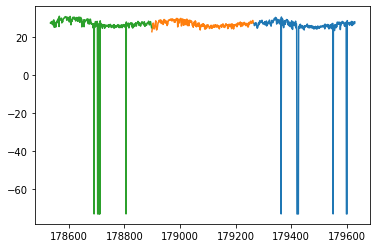

In [ ]:
sliced = data[data['City']=='Lagos']
sliced = sliced[sliced['Year']==2012]
plt.plot(sliced.index,sliced['AvgTemperature'])
sliced = data[data['City']=='Lagos']
sliced = sliced[sliced['Year']==2011]
plt.plot(sliced.index,sliced['AvgTemperature'])
sliced = data[data['City']=='Lagos']
sliced = sliced[sliced['Year']==2010]
plt.plot(sliced.index,sliced['AvgTemperature'])
#sliced.describe

So we should notice why 2020 is looking different on the averages listed above from this plot. What this has also highlighted is the fact that there are some uncharacteristically low values in 2018 and 2019. This data may actually need *cleaning* to avoid undue effects on subsequent modelling.

In [ ]:
print("Number of null values:")
print(sum(sliced['AvgTemperature'].isnull()))
print("Number of N\A values:")
print(sum(sliced['AvgTemperature'].isna()))
print("Number of low values (<20):")
print(sum(sliced['AvgTemperature']<20))

Number of null values:
0
Number of N\A values:
0
Number of low values (<20):
7


Let's look into these 3 values in more detail:

In [ ]:
sliced[sliced['AvgTemperature']<20].index

Int64Index([178691, 178704, 178705, 178706, 178710, 178712, 178806], dtype='int64')

In [ ]:
print(sliced.loc[[178691, 178704, 178705, 178706, 178710, 178712, 178806]])

        Region  Country State   City  Month  Day  Year  AvgTemperature
178691  Africa  Nigeria   NaN  Lagos      6    7  2010           -72.8
178704  Africa  Nigeria   NaN  Lagos      6   20  2010           -72.8
178705  Africa  Nigeria   NaN  Lagos      6   21  2010           -72.8
178706  Africa  Nigeria   NaN  Lagos      6   22  2010           -72.8
178710  Africa  Nigeria   NaN  Lagos      6   26  2010           -72.8
178712  Africa  Nigeria   NaN  Lagos      6   28  2010           -72.8
178806  Africa  Nigeria   NaN  Lagos      9   30  2010           -72.8


So there is clearly values included here in error since Vienna didn't have -72.8 Celsius weather on these three days. We have a few options here to *clean* this bad data:

i)  We can cut it from the dataframe

ii) We can *impute* it

In [ ]:
# Let's drop the first one from the dataset and see what it looks like now:
sliced = sliced.drop(index=178705)

Now let's look at the next pair. We can swap these values for the mean of the data either side, or the median  of the year.

In [ ]:
print(sliced.loc[[178691, 178710, 178712, 178806]])

        Region  Country State   City  Month  Day  Year  AvgTemperature
178691  Africa  Nigeria   NaN  Lagos      6    7  2010           -72.8
178710  Africa  Nigeria   NaN  Lagos      6   26  2010           -72.8
178712  Africa  Nigeria   NaN  Lagos      6   28  2010           -72.8
178806  Africa  Nigeria   NaN  Lagos      9   30  2010           -72.8


In [ ]:
sliced.at[178691,'AvgTemperature'] = 0.5*(sliced.at[178690,'AvgTemperature'] + sliced.at[178693,'AvgTemperature'])

In [ ]:
sliced.at[178691,'AvgTemperature'] = sliced.at[178693,'AvgTemperature']

In [ ]:
print(sliced.loc[[178691, 178710, 178712, 178806]])

        Region  Country State   City  Month  Day  Year  AvgTemperature
178691  Africa  Nigeria   NaN  Lagos      6    7  2010            24.9
178710  Africa  Nigeria   NaN  Lagos      6   26  2010           -72.8
178712  Africa  Nigeria   NaN  Lagos      6   28  2010           -72.8
178806  Africa  Nigeria   NaN  Lagos      9   30  2010           -72.8


In [ ]:
sliced.at[178691,'AvgTemperature'] = sliced.loc[178200:179800,"AvgTemperature"].median()

In [ ]:
#sliced.at[178806,'AvgTemperature'] = sliced.loc[178200:179800,"AvgTemperature"].mean()

In [ ]:
# sliced.at[178806,'AvgTemperature'] = sliced.loc[178670:178690,"AvgTemperature"].mode()

In [ ]:
# sliced.at[178806,'AvgTemperature'] = sliced.loc[178600:178690,"AvgTemperature"].std()

In [ ]:
print(sliced.loc[[178691]])

        Region  Country State   City  Month  Day  Year  AvgTemperature
178691  Africa  Nigeria   NaN  Lagos      6    7  2010            26.9


So now we've dropped one from the dataset, replaced another with the mean of surrounding points and the other with the median. We'll look more into what the difference in these statistics can be later on. For now, let's look at the updated plot.

Maximum is: 
30.8
Minimum is: 
24.5


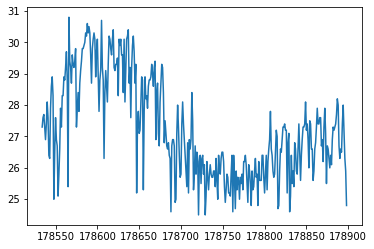

In [ ]:
plt.plot(sliced.index,sliced['AvgTemperature'])
print('Maximum is: ')
print(sliced['AvgTemperature'].max())
print('Minimum is: ')
print(sliced['AvgTemperature'].min())